# SETUP

In [7]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

## Important Positions
- GK: (-14, 0, 0)
- Left Post (from GKs View): (-15, 1, 0)
- Right Post (from GKs View): (-15, -1, 0)
	- Goal Line: (-15, [-1, 1], 0)
- Furthest Spawnpoint on Left Lane (from GKs View): (-6, 10, 0)
- Furthest Spawnpoint on Right Lane (from GKs View): (-6, -10, 0)
- Closest Spawnpoint on Left Lane (from GKs View): (-10, 6, 0)
- Closest Spawnpoint on Right Lane (from GKs View): (-10, -6, 0)
- Intersection of furthest points towards respective posts: (-16, 0, 0)

### Calculate direction of the ball towards goal

In [3]:
def calculate_orientation_towards_goal(point):
    # Define the goal line
    goal_line_x = -15
    goal_line_y_min = -1
    goal_line_y_max = 1

    # Generate a random y-coordinate on the goal line
    random_goal_y = random.uniform(goal_line_y_min, goal_line_y_max)
    random_goal_point = (goal_line_x, random_goal_y)

    # Calculate the angle to the random point on the goal line
    dx = random_goal_point[0] - point[0]
    dy = random_goal_point[1] - point[1]
    angle_to_goal = math.degrees(math.atan2(dy, dx))

    # Ensure the angle is within [0, 360]
    if angle_to_goal < 0:
        angle_to_goal += 360

    return angle_to_goal

### Calculate ball spawn positions:

In [4]:
import random
import math

def random_point_within_area():
    # Define the constants for the problem
    intersection_point = (-16, 0, 0)  # Center of the circular area
    furthest_point_left = (-6, 10, 0)
    furthest_point_right = (-6, -10, 0)
    closest_point_left = (-10, 6, 0)
    closest_point_right = (-10, -6, 0)

    # Calculate the radii of the circles
    furthest_radius = math.sqrt((furthest_point_left[0] - intersection_point[0])**2 + 
                                (furthest_point_left[1] - intersection_point[1])**2)
    closest_radius = math.sqrt((closest_point_left[0] - intersection_point[0])**2 + 
                               (closest_point_left[1] - intersection_point[1])**2)

    # Calculate the angles of the bounding lines in radians
    angle_left = math.atan2(furthest_point_left[1] - intersection_point[1],
                            furthest_point_left[0] - intersection_point[0])
    angle_right = math.atan2(furthest_point_right[1] - intersection_point[1],
                             furthest_point_right[0] - intersection_point[0])

    # Ensure the angles are ordered correctly (left should be greater than right)
    if angle_left < angle_right:
        angle_left, angle_right = angle_right, angle_left

    # Generate a random radius and angle within the specified range
    radius = random.uniform(closest_radius, furthest_radius)
    angle = random.uniform(angle_right, angle_left)

    # Convert polar coordinates back to Cartesian coordinates
    x = intersection_point[0] + radius * math.cos(angle)
    y = intersection_point[1] + radius * math.sin(angle)

    # Calculate the rotation to face towards a random point on the goal line
    rotation = calculate_orientation_towards_goal((x, y, 0))

    return (x, y, rotation)

def calculate_orientation_towards_goal(point):
    # Define the goal line
    goal_line_x = -15
    goal_line_y_min = -1
    goal_line_y_max = 1

    # Generate a random y-coordinate on the goal line
    random_goal_y = random.uniform(goal_line_y_min, goal_line_y_max)
    random_goal_point = (goal_line_x, random_goal_y)

    # Calculate the angle to the random point on the goal line
    dx = random_goal_point[0] - point[0]
    dy = random_goal_point[1] - point[1]
    angle_to_goal = math.degrees(math.atan2(dy, dx))

    # Ensure the angle is within [0, 360]
    if angle_to_goal < 0:
        angle_to_goal += 360

    return angle_to_goal

In [5]:
# Example usage
point = random_point_within_area()
print(point)

(-6.932047235157976, -1.8381308457059982, 172.54782190504758)


## Plot

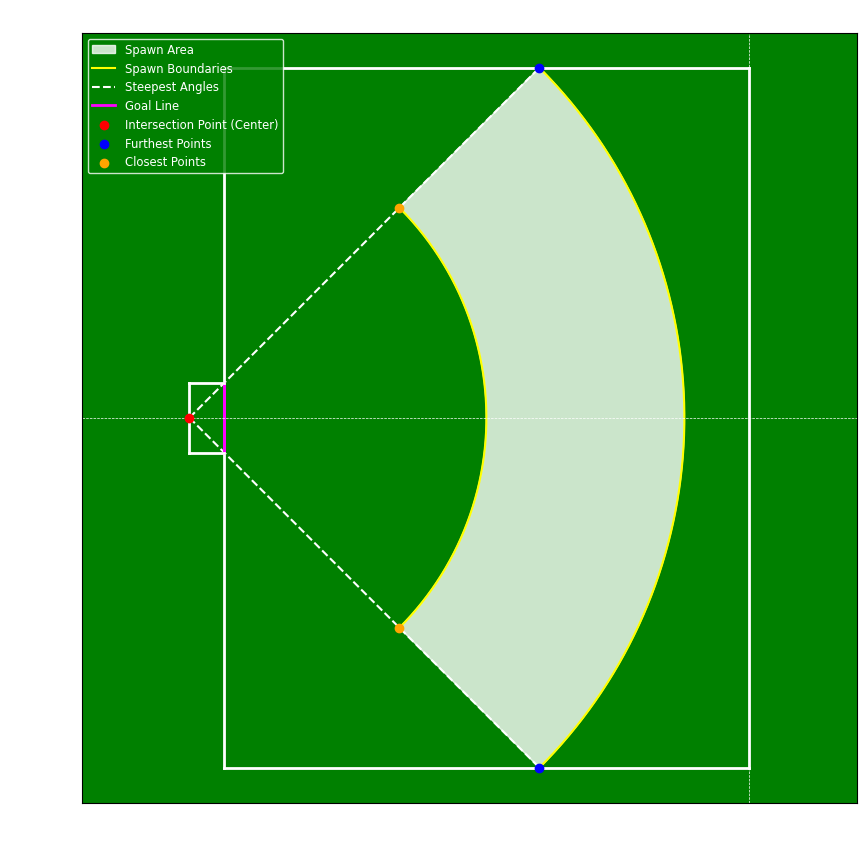

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Constants for the area
intersection_point = (-16, 0)  # Center of the circular area
furthest_point_left = (-6, 10)
furthest_point_right = (-6, -10)
closest_point_left = (-10, 6)
closest_point_right = (-10, -6)
corner_post_left = (-15, 10)
corner_post_right = (-15, -10)

# Compute radii
furthest_radius = np.sqrt((furthest_point_left[0] - intersection_point[0])**2 +
                          (furthest_point_left[1] - intersection_point[1])**2)
closest_radius = np.sqrt((closest_point_left[0] - intersection_point[0])**2 +
                         (closest_point_left[1] - intersection_point[1])**2)

# Compute angles in radians
angle_left = np.arctan2(furthest_point_left[1] - intersection_point[1],
                        furthest_point_left[0] - intersection_point[0])
angle_right = np.arctan2(furthest_point_right[1] - intersection_point[1],
                         furthest_point_right[0] - intersection_point[0])

# Create angles for plotting
theta = np.linspace(angle_right, angle_left, 500)

# Generate arcs for furthest and closest radii
x_furthest = intersection_point[0] + furthest_radius * np.cos(theta)
y_furthest = intersection_point[1] + furthest_radius * np.sin(theta)

x_closest = intersection_point[0] + closest_radius * np.cos(theta)
y_closest = intersection_point[1] + closest_radius * np.sin(theta)

# Combine the arcs into a single closed path for filling
x_area = np.concatenate([x_furthest, x_closest[::-1]])
y_area = np.concatenate([y_furthest, y_closest[::-1]])

# Define the football pitch boundaries and the goal dimensions
pitch_top = 12
pitch_bottom = -12
pitch_left = -18
pitch_right = 0
goal_top = 1
goal_bottom = -1
goal_depth = -16
goal_line_left = (-15, 1)
goal_line_right = (-15, -1)

# Adjust the top and bottom boundaries to align with the new left boundary
pitch_top = corner_post_left[1]
pitch_bottom = corner_post_right[1]

# Plot the quarter-circular area with a football pitch theme
plt.figure(figsize=(10, 10))
plt.fill(x_area, y_area, color='white', alpha=0.8, label="Spawn Area")  # Change fill to white for contrast

# Set the background color to green to resemble a pitch
plt.gca().set_facecolor('green')

# Plot the arcs and boundary lines with adjusted colors for readability
plt.plot(x_furthest, y_furthest, label="Spawn Boundaries", color='yellow', linewidth=1.5)
plt.plot(x_closest, y_closest, color='yellow', linewidth=1.5)
plt.plot([intersection_point[0], furthest_point_left[0]], [intersection_point[1], furthest_point_left[1]], 'white', linestyle='--', label="Steepest Angles")
plt.plot([intersection_point[0], furthest_point_right[0]], [intersection_point[1], furthest_point_right[1]], 'white', linestyle='--')

# Draw the pitch boundary
plt.plot([corner_post_left[0], corner_post_right[0]], [corner_post_left[1], corner_post_right[1]], 'white', linewidth=2)  # Left boundary
plt.plot([pitch_right, pitch_right], [pitch_bottom, pitch_top], 'white', linewidth=2)  # Right boundary
plt.plot([corner_post_left[0], pitch_right], [pitch_top, pitch_top], 'white', linewidth=2)  # Top boundary
plt.plot([corner_post_right[0], pitch_right], [pitch_bottom, pitch_bottom], 'white', linewidth=2)  # Bottom boundary

# Plot the goal line and goal area
plt.plot([goal_line_left[0], goal_line_right[0]], [goal_line_left[1], goal_line_right[1]], 'magenta', label="Goal Line", linewidth=2)  # Goal line
plt.plot([goal_line_left[0], goal_line_left[0]], [goal_top, goal_bottom], 'magenta', linewidth=2)  # Vertical posts
plt.plot([goal_line_left[0], goal_depth], [goal_top, goal_top], 'white', linewidth=2)  # Top of goal
plt.plot([goal_line_left[0], goal_depth], [goal_bottom, goal_bottom], 'white', linewidth=2)  # Bottom of goal
plt.plot([goal_depth, goal_depth], [goal_top, goal_bottom], 'white', linewidth=2)  # Back of goal

# Mark points for clarity, placing them on top of boundaries
plt.scatter(*intersection_point, color='red', label="Intersection Point (Center)", zorder=5)
plt.scatter(*furthest_point_left, color='blue', label="Furthest Points", zorder=5)
plt.scatter(*furthest_point_right, color='blue', zorder=5)
plt.scatter(*closest_point_left, color='orange', label="Closest Points", zorder=5)
plt.scatter(*closest_point_right, color='orange', zorder=5)

# Label and style the plot
plt.title("Possible Ball Spawn Area on Football Pitch with Aligned Boundaries", color='white', fontsize=14)
plt.xlabel("X Position", color='white')
plt.ylabel("Y Position", color='white')
plt.axhline(0, color='white', linewidth=0.5, linestyle="--")
plt.axvline(0, color='white', linewidth=0.5, linestyle="--")
plt.grid(False)

# Add a smaller legend with white text for readability
plt.legend(fontsize='small', facecolor='green', edgecolor='white', labelcolor='white')
plt.axis('equal')

# Adjust tick colors for better visibility on the green background
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()
